# Histogram

*Which Hogwarts course has a homogeneous score distribution between all four houses?*

We can observe that *Arithmancy* and *Care of Magical Creatures* exhibit normal distributions that overlap across all four houses.


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplcatppuccin
mpl.style.use('mocha')

%run "utils.ipynb"

df = get_data()

houses = df["Hogwarts House"].unique()
columns = {column: [] for column in df.select_dtypes(include=['number']).columns}
colors = ['blue', 'green', 'red', 'purple']

num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

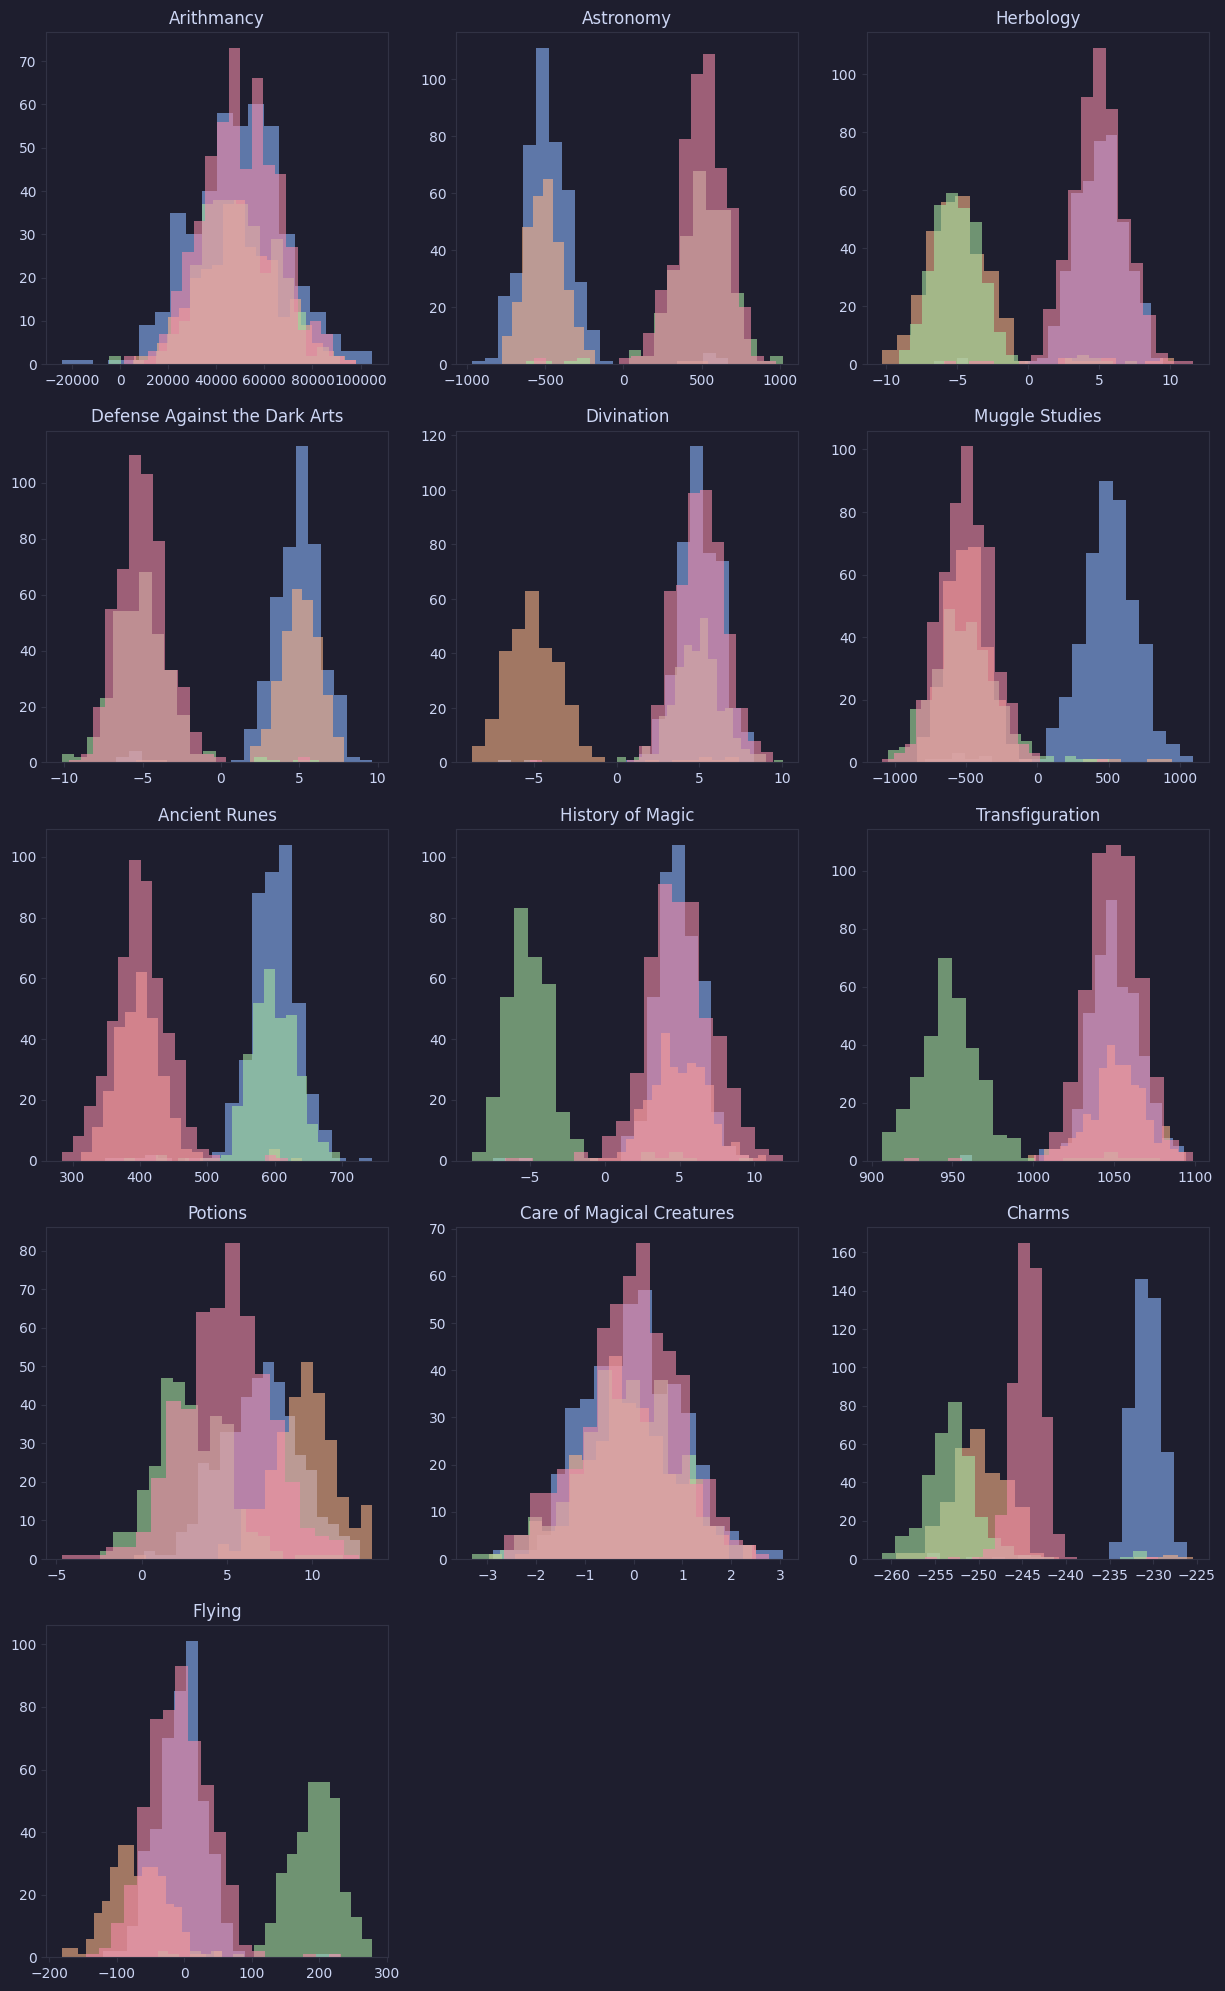

In [4]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
axes = axes.flatten()

i = 0
for column in columns:
    j = 0
    for house in houses:
        house_data = df[df["Hogwarts House"] == house]
        axes[i].hist(house_data[column], bins = 20, alpha = 0.6)
        axes[i].set_label(house)
        axes[i].set_title(column)
        j += 1
    i += 1

# Hide empty subplots
for j in range(num_plots, num_cols*num_rows):
    axes[j].axis('off')
plt.show()